In [1]:
import os

import numpy as np
np.set_printoptions(precision=2)
import torch
import matplotlib.pyplot as plt

from bmadx import Particle
from bmadx.plot import plot_projections

from stats import (
    read_all_particles,
    show_cov_stats,
    plot_projections_with_contours
)

In [2]:
dr = os.path.join('data', 'non_gaussian_beam')

In [3]:
gt = torch.load(os.path.join(dr, 'stats_t', 'non_gaussian_beam.pt')).numpy_particles()

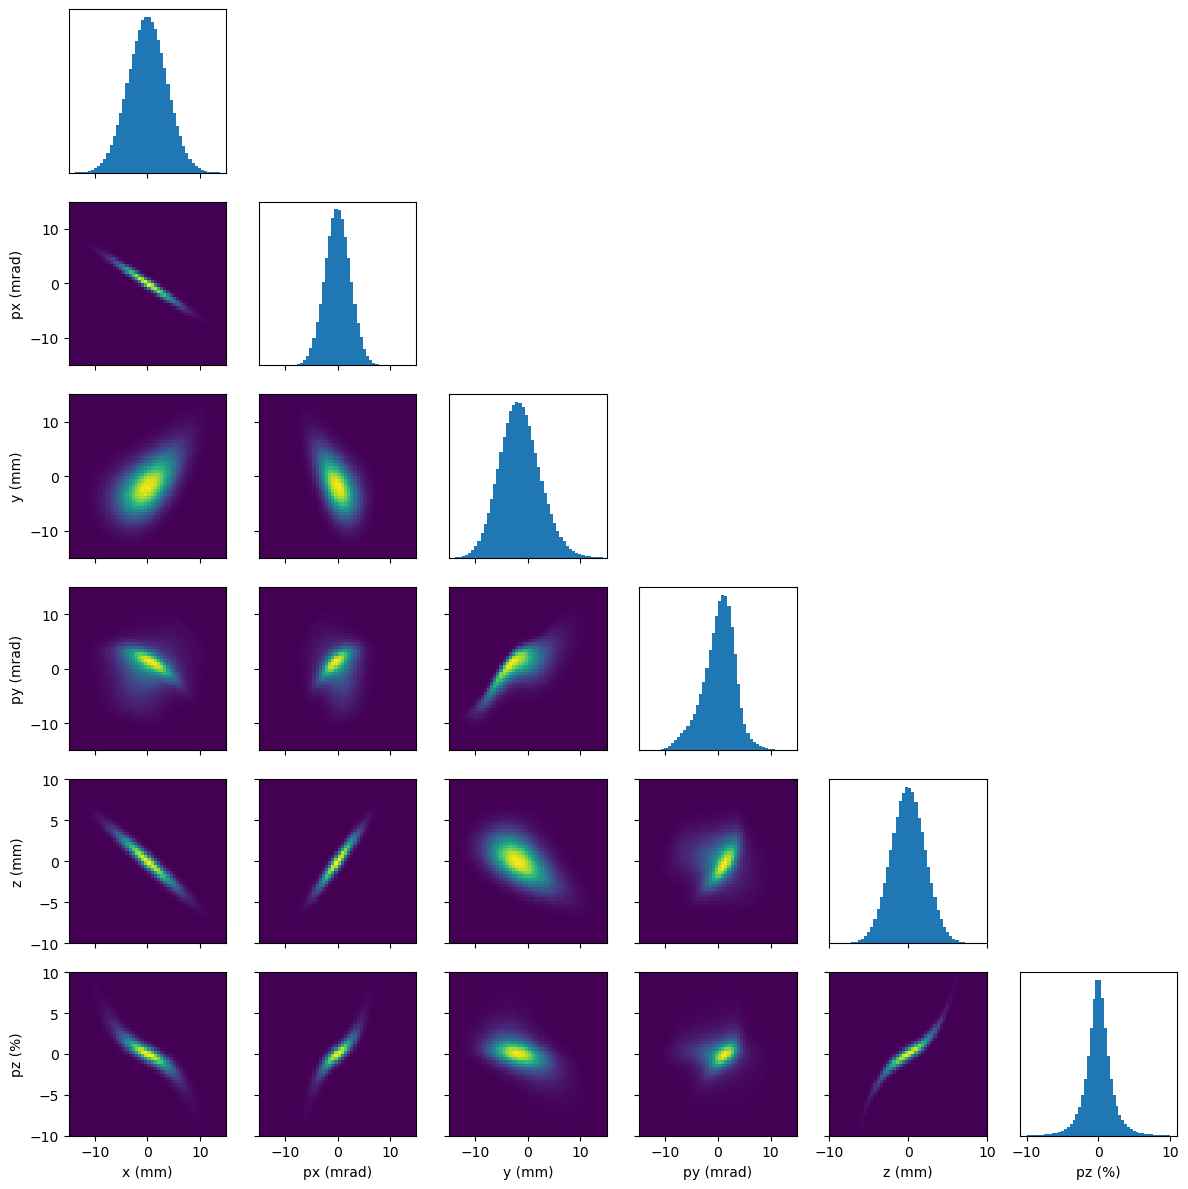

In [4]:
# plot gt:
lims = np.array([
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-10e-3,10e-3],
    [-10e-2,10e-2]
])
plot_projections(gt, custom_lims=lims)
plt.show()

In [5]:
pars = read_all_particles(
    dr = os.path.join(dr, 'stats_t'),
    n_beams = 100, 
    n_par = 100_000
)

In [6]:
par_concat = np.swapaxes(pars, 0, 1).reshape((6, 100_000*100))

In [7]:
r_avg = Particle(
    *par_concat,
    p0c = gt.p0c,
    s = gt.s,
    mc2 = gt.mc2
)

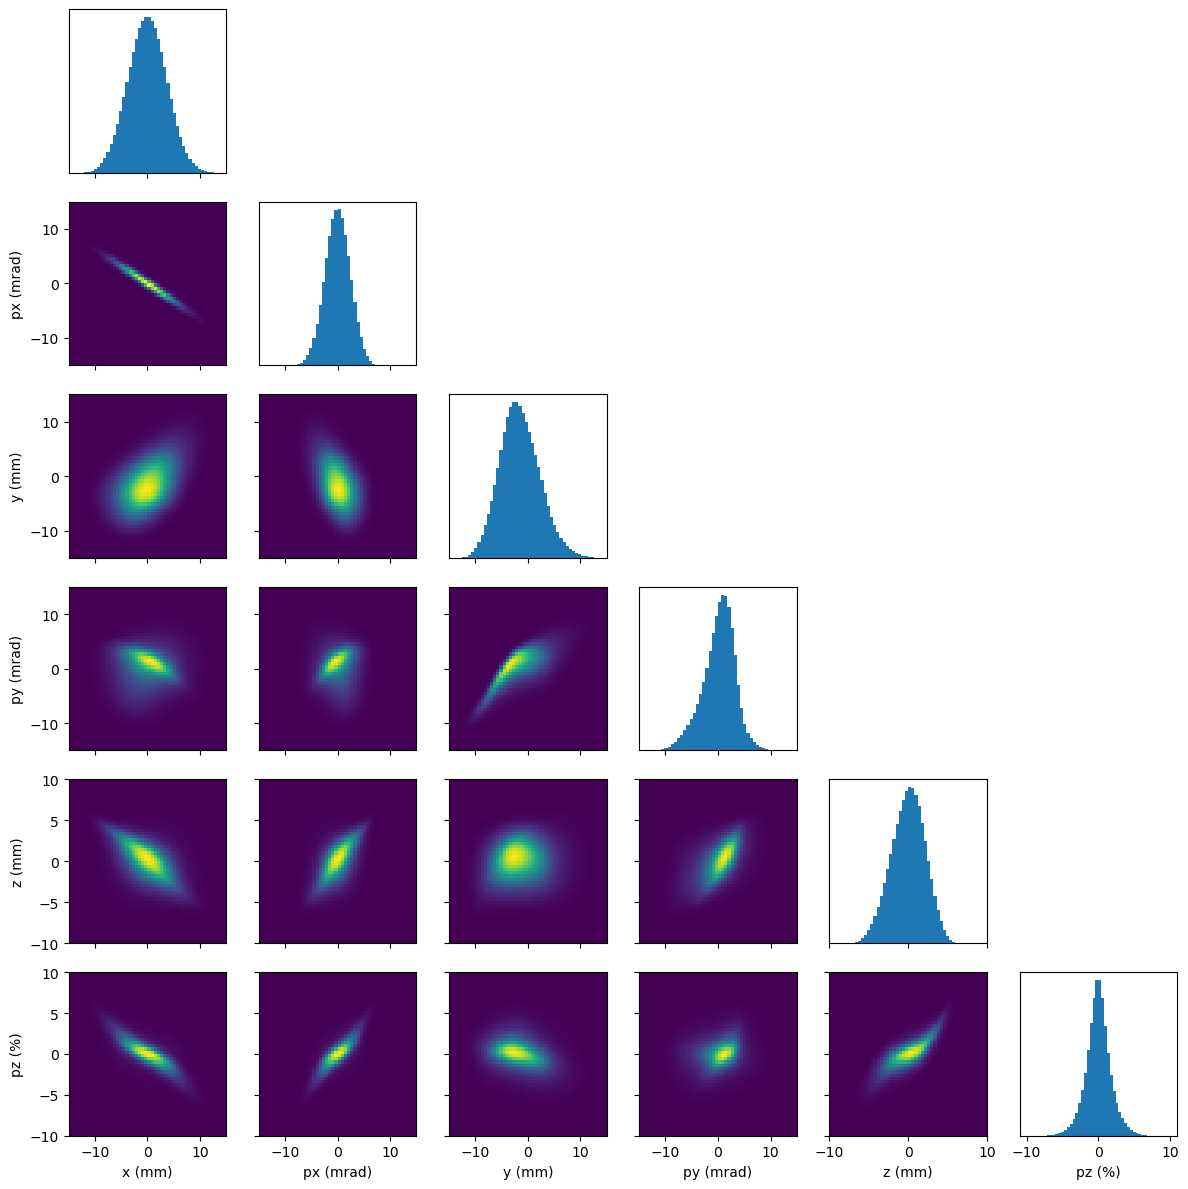

In [8]:
plot_projections(r_avg, custom_lims=lims)
plt.show()

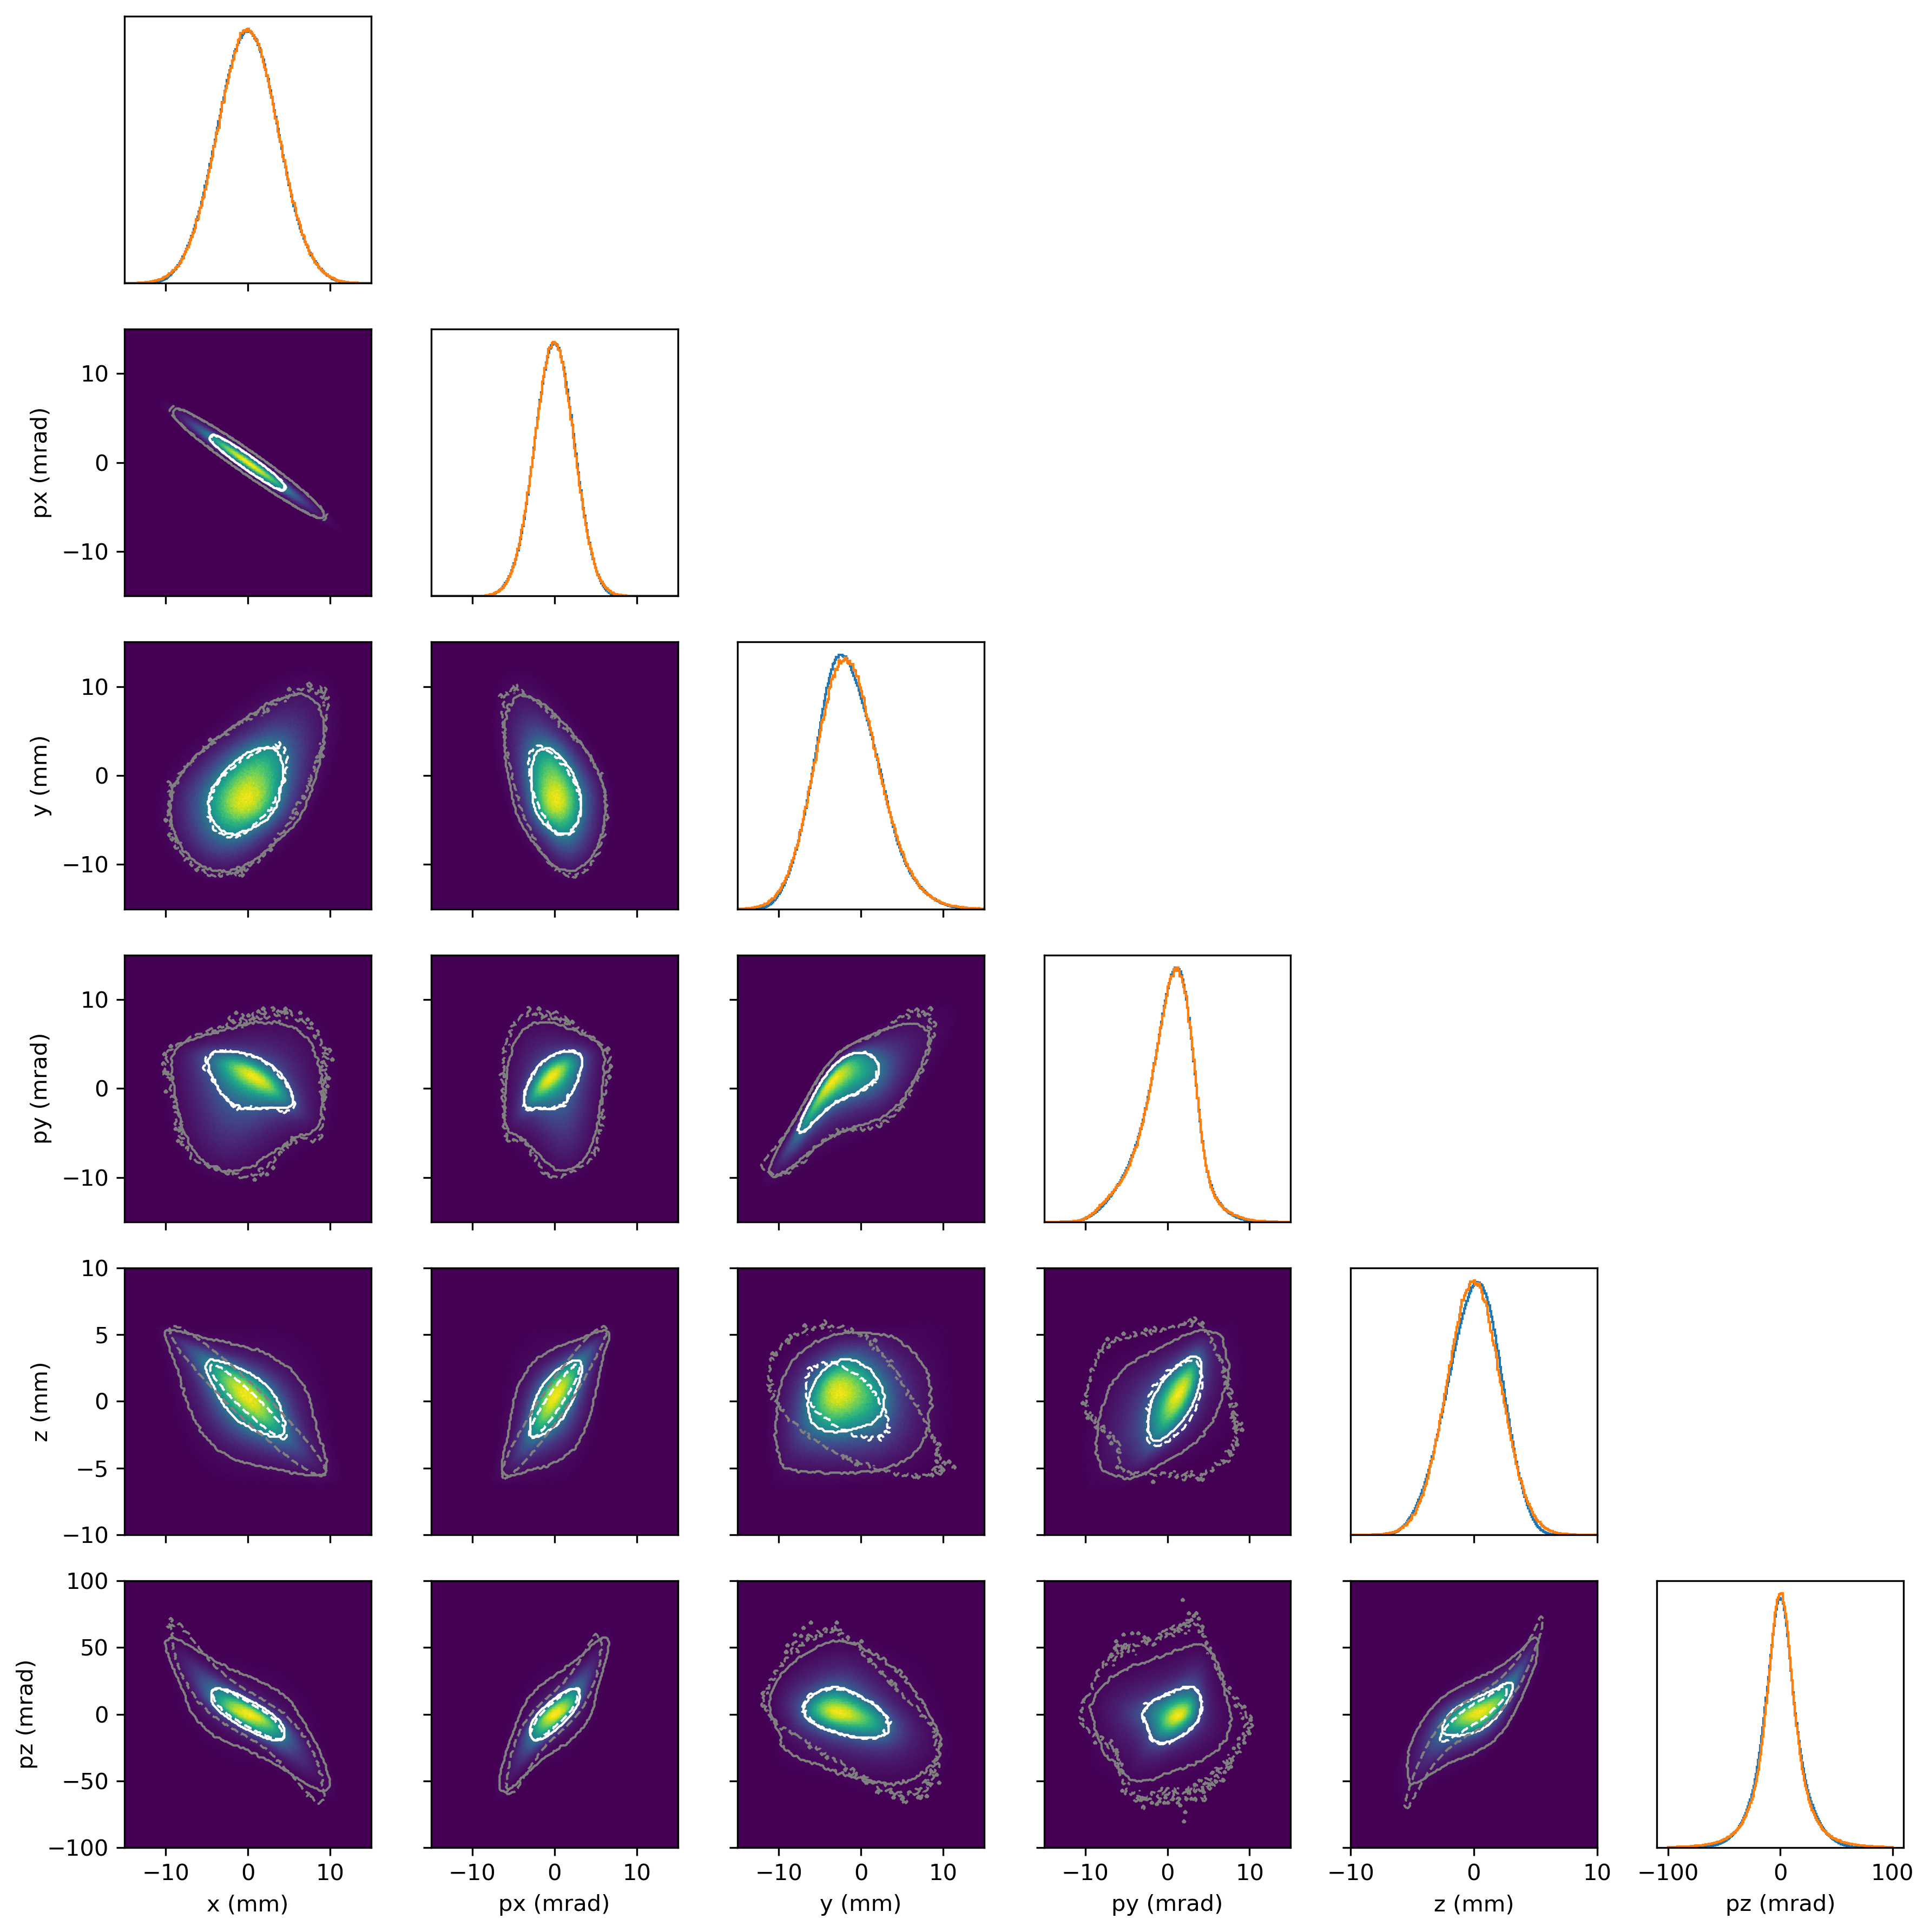

In [9]:
plot_projections_with_contours(
    r_avg,
    gt,
    bins=200,
    contour_percentiles = [50, 95],
    custom_lims=lims,
    contour_smoothing_r=0.5,
    contour_smoothing_gt=0.5
)
plt.show()

ground truth: 
[[ 10.96  -7.01   6.81  -0.54  -6.24 -49.76]
 [ -7.01   4.62  -4.37   0.34   4.04  32.25]
 [  6.81  -4.37  11.02   5.64  -3.93 -31.03]
 [ -0.54   0.34   5.64   6.02   0.31   2.71]
 [ -6.24   4.04  -3.93   0.31   3.74  29.88]
 [-49.76  32.25 -31.03   2.71  29.88 258.59]]

reconstruction avg: 
[[ 9.61e+00 -6.12e+00  5.18e+00 -2.17e-01 -3.27e+00 -3.59e+01]
 [-6.12e+00  4.04e+00 -3.07e+00  3.29e-01  2.21e+00  2.33e+01]
 [ 5.18e+00 -3.07e+00  1.04e+01  5.50e+00  8.74e-02 -1.86e+01]
 [-2.17e-01  3.29e-01  5.50e+00  5.85e+00  2.32e+00  6.34e+00]
 [-3.27e+00  2.21e+00  8.74e-02  2.32e+00  3.27e+00  2.01e+01]
 [-3.59e+01  2.33e+01 -1.86e+01  6.34e+00  2.01e+01  2.06e+02]]

reconstruction std: 
[[ 0.96  0.62  0.82  0.4   1.86 12.23]
 [ 0.62  0.4   0.57  0.24  1.15  7.66]
 [ 0.82  0.57  0.89  0.61  1.87  9.11]
 [ 0.4   0.24  0.61  0.56  0.9   3.38]
 [ 1.86  1.15  1.87  0.9   0.4   4.47]
 [12.23  7.66  9.11  3.38  4.47 32.78]]

reconstruction relative uncertainty: 
[[ 0.1  -0.1   0.

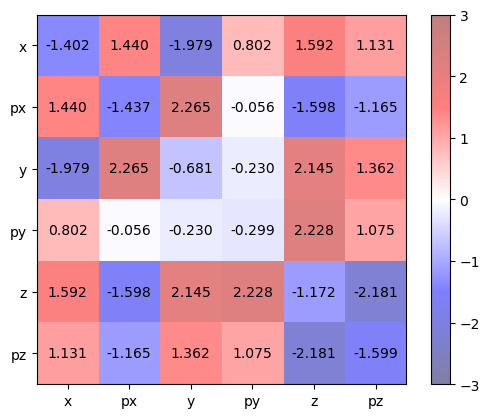

In [10]:
show_cov_stats(pars, gt, beam_fraction=0.5)

ground truth: 
[[ 12.02  -7.66   6.85  -0.71  -6.77 -55.52]
 [ -7.66   5.12  -4.39   0.46   4.41  36.11]
 [  6.85  -4.39  13.66   8.29  -3.94 -32.25]
 [ -0.71   0.46   8.29   9.12   0.41   3.34]
 [ -6.77   4.41  -3.94   0.41   4.12  33.83]
 [-55.52  36.11 -32.25   3.34  33.83 307.48]]

reconstruction avg: 
[[ 1.24e+01 -7.88e+00  5.93e+00 -2.01e-01 -4.00e+00 -4.51e+01]
 [-7.88e+00  5.25e+00 -3.49e+00  3.67e-01  2.72e+00  2.95e+01]
 [ 5.93e+00 -3.49e+00  1.33e+01  7.93e+00  7.16e-01 -1.84e+01]
 [-2.01e-01  3.67e-01  7.93e+00  8.74e+00  3.28e+00  1.02e+01]
 [-4.00e+00  2.72e+00  7.16e-01  3.28e+00  4.20e+00  2.61e+01]
 [-4.51e+01  2.95e+01 -1.84e+01  1.02e+01  2.61e+01  2.70e+02]]

reconstruction std: 
[[ 0.29  0.19  0.54  0.25  2.18 15.33]
 [ 0.19  0.13  0.45  0.12  1.32  9.47]
 [ 0.54  0.45  0.42  0.34  2.15 12.54]
 [ 0.25  0.12  0.34  0.31  1.25  6.45]
 [ 2.18  1.32  2.15  1.25  0.39  3.71]
 [15.33  9.47 12.54  6.45  3.71 23.6 ]]

reconstruction relative uncertainty: 
[[ 0.02 -0.02  0.

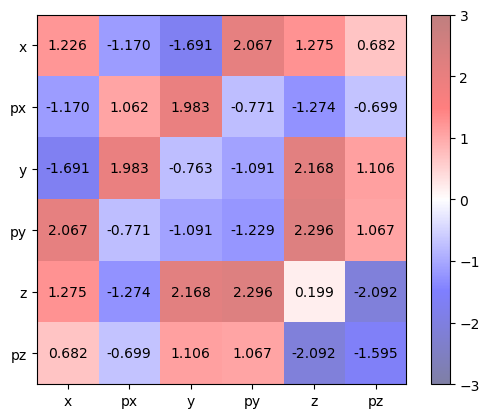

In [11]:
show_cov_stats(pars, gt, beam_fraction=0.95)

ground truth: 
[[ 13.56  -8.66   7.81  -0.57  -7.69 -69.25]
 [ -8.66   5.78  -5.02   0.37   5.    45.06]
 [  7.81  -5.02  15.11   9.07  -4.52 -40.69]
 [ -0.57   0.37   9.07   9.94   0.33   2.71]
 [ -7.69   5.    -4.52   0.33   4.69  42.25]
 [-69.25  45.06 -40.69   2.71  42.25 434.98]]

reconstruction avg: 
[[ 13.19  -8.42   6.33  -0.11  -4.27 -48.88]
 [ -8.42   5.63  -3.74   0.32   2.91  32.15]
 [  6.33  -3.74  14.19   8.58   0.86 -18.53]
 [ -0.11   0.32   8.58   9.5    3.55  11.72]
 [ -4.27   2.91   0.86   3.55   4.51  28.85]
 [-48.88  32.15 -18.53  11.72  28.85 301.62]]

reconstruction std: 
[[ 0.18  0.12  0.46  0.25  2.38 17.66]
 [ 0.12  0.09  0.43  0.09  1.45 10.92]
 [ 0.46  0.43  0.25  0.17  2.39 15.38]
 [ 0.25  0.09  0.17  0.17  1.41  8.22]
 [ 2.38  1.45  2.39  1.41  0.46  4.  ]
 [17.66 10.92 15.38  8.22  4.   24.02]]

reconstruction relative uncertainty: 
[[ 0.01 -0.01  0.07 -2.33 -0.56 -0.36]
 [-0.01  0.02 -0.11  0.28  0.5   0.34]
 [ 0.07 -0.11  0.02  0.02  2.76 -0.83]
 [-2.33 

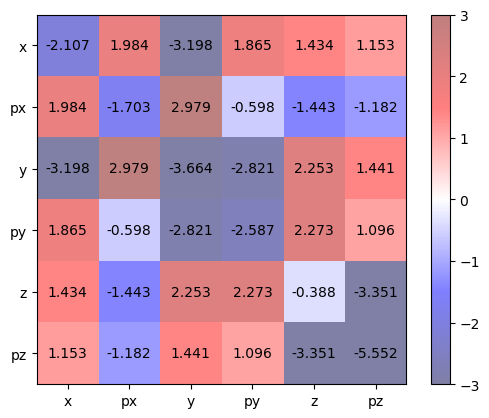

In [12]:
np.set_printoptions(precision=2, suppress=True)
show_cov_stats(pars, gt, beam_fraction=1.0)